Halo guys, hari ini kita coba belajar hal yang paling dasar atau simple dari preprocessing image nih, seperti rotation, resize, dan cropping gambar. Disini saya pake gambar Messi ya yg saya download di google. 

Download dulu gambarnya ya

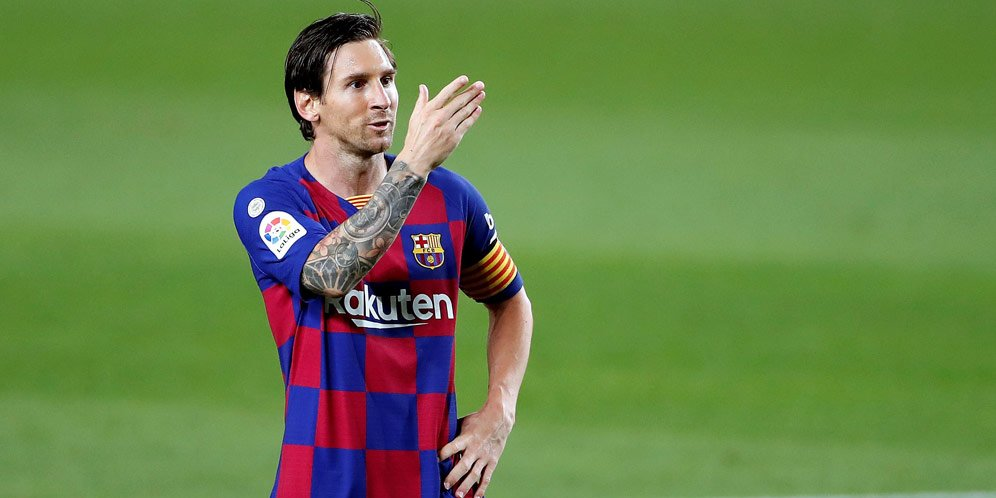

Oke pertama kita biasa import librarynya dulu, dan panggil gambarnya. 

In [1]:
# Import OpenCV library
import cv2
# kita import library opencv 

# Read Image
img = cv2.imread("messi.jpg")
# imread merupakan fungsi yang ada di cv2(opencv) untuk memanggil gambar "messi.jpg", 
# bahasa lainnya imread akan mengembalikan array NumPy, mewakili gambar itu sendiri

# Show image
cv2.imshow("Gambar Messi", img )
# imshow digunakan untuk menampilkan gambar.Parameter pertama adalah string, "nama" dari window. 
# Parameter kedua adalah referensi ke gambar yang kita muat di code sebelumnya(img) 

cv2.waitKey(0)
# waitKey digunakan untuk menghentikan eksekusi script hingga saat menekan tombol pada keyboard. 
# Menggunakan parameter "0" menunjukkan bahwa penekanan tombol apa pun akan menghentikan sementara eksekusi.


48

Kita akan dapatkan output seperti dibawah ini
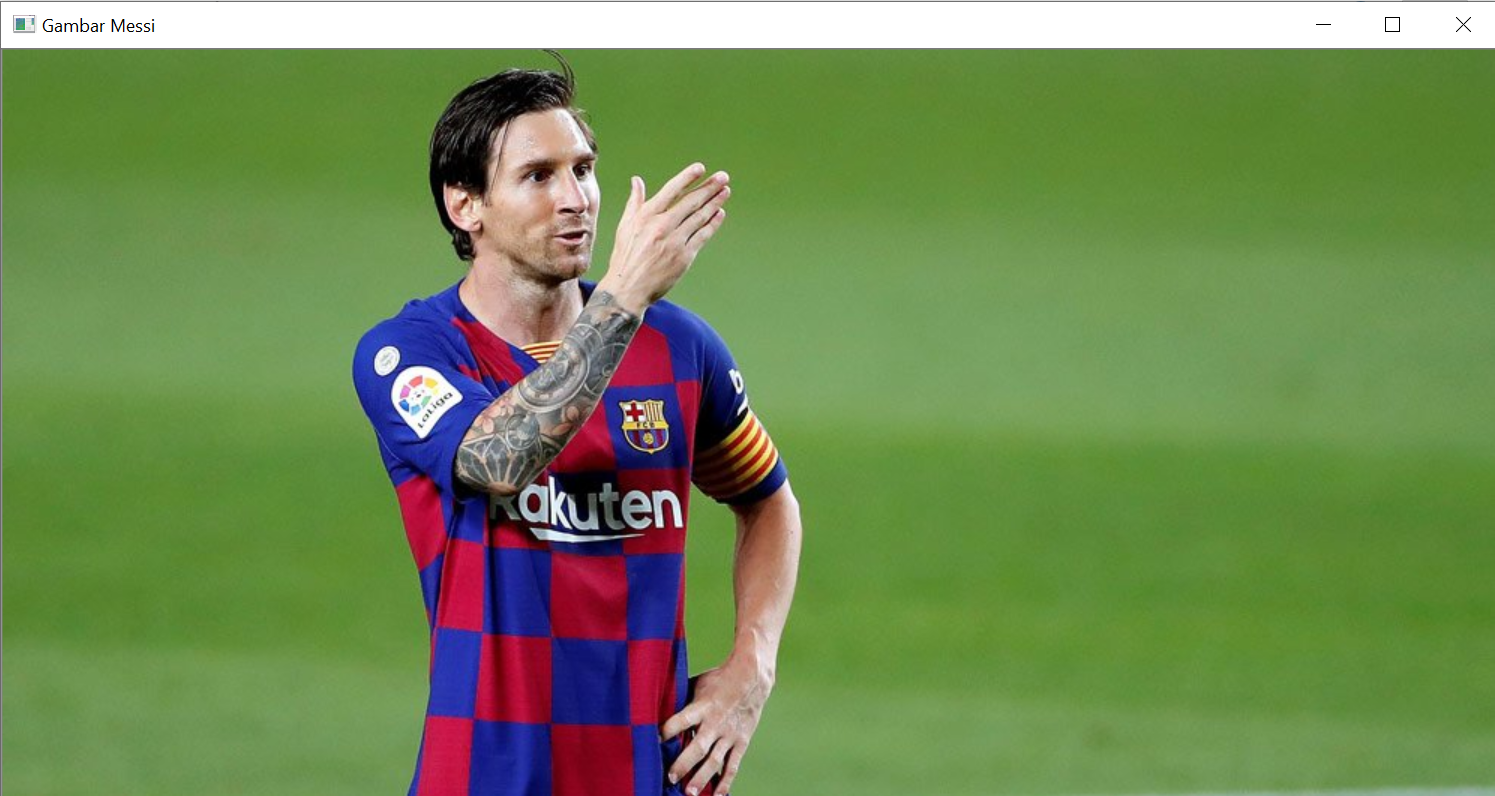

Selanjutnya kita akan mengubah ukuran gambar ini dan membuatnya sedikit lebih kecil. Kita dapat memeriksa dimensi gambar dengan menggunakan atribut atau fungsi shape, karena gambar adalah array NumPy

In [2]:
# print the dimensions of the image
print(img.shape)

(498, 996, 3)


Ketika menjalankan kode ini, kita melihat bahwa outputnya (498, 996, 3). Ini berarti bahwa gambar memiliki 498 baris, 996 kolom, dan 3 channel (komponen RGB). Ketika kita menulis matriks, adalah umum untuk menuliskannya dalam bentuk (# baris x # kolom) -> sama dengan cara menentukan ukuran matriks dalam NumPy.

Namun, ketika kita memperhatikan gambar ini dapat menjadi sedikit membingungkan karena biasanya menentukan gambar dalam hal lebar x tinggi. Melihat bentuk matriks, kita mungkin berpikir bahwa gambar kita lebar 498 pixel dan tinggi 996 pixel. Namun, ini tidak benar. Gambar kita sebenarnya memiliki lebar 996 pixel dan tinggi 498 pixel, menyiratkan bahwa tingginya adalah entri pertama dalam bentuk dan lebar adalah yang kedua.

Karena kita tahu bahwa gambar kita memiliki lebar 996 pixel, mari ubah ukurannya dan buatlah lebar 100 pixel

In [3]:
r = 100.0 / img.shape[0]
dim = (100, int(img.shape[0] * r))

Kita harus tetap mengingat aspek rasio gambar, yang merupakan hubungan proporsional antara lebar dan tinggi gambar. Dalam hal ini, kita akan mengubah ukuran gambar untuk memiliki lebar 100 piksel, oleh karena itu, kita perlu menghitung r, rasio lebar baru dengan lebar lama. Kemudian, kita membuat dimensi baru gambar dengan menggunakan 100 piksel untuk lebar, dan r x tinggi gambar lama. Dengan melakukan ini, kita dapat mempertahankan rasio aspek gambar.

In [4]:
# perform the actual resizing of the image and show it
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2.imshow("resize gambar", resized)
cv2.waitKey(0)

48

Disini kita akan mengubah ukuran gambar. Parameter pertama adalah gambar asli yang ingin kita ubah ukurannya(img) dan argumen kedua adalah dimensi gambar kita yang baru(dim). Parameter ketiga memberi tahu kita algoritma yang akan digunakan saat mengubah ukuran(cv2.inter_area).

In [5]:
# grab the dimensions of the image and calculate the center
# of the image
(h, w) = img.shape[:2]
center = (w / 2, h / 2)

kita mengambil lebar dan tinggi gambar dan menyimpannya dalam variabel masing-masing.
kemudian menghitung bagian tengah/pusat gambar(center), disini kita cukup membagi lebar dan tinggi dengan 2.

In [6]:
# rotate the image by 180 degrees
M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
cv2.imshow("rotate gambar", rotated)
cv2.waitKey(0)

48

kemudian kita menghitung matriks yang dapat digunakan untuk memutar (dan menskalakan) gambar. Argumen pertama adalah pusat gambar (center) yang kita hitung. Jika kita ingin memutar gambar di sekitar titik sembarang, ini adalah tempat kita akan memasok titik itu. Argumen kedua adalah sudut rotasi yang kita guanakan (dalam derajat). Dan argumen ketiga adalah faktor penskalaan kita, dalam hal ini, 1.0, karena kita ingin mempertahankan skala asli gambar. Jika kita ingin membagi dua ukuran gambar, kita akan menggunakan 0,5. Demikian pula, jika kita ingin menggandakan ukuran gambar, kita akan menggunakan 2.0.

Ini adalah output ketika kita menggunakan skala 1.0
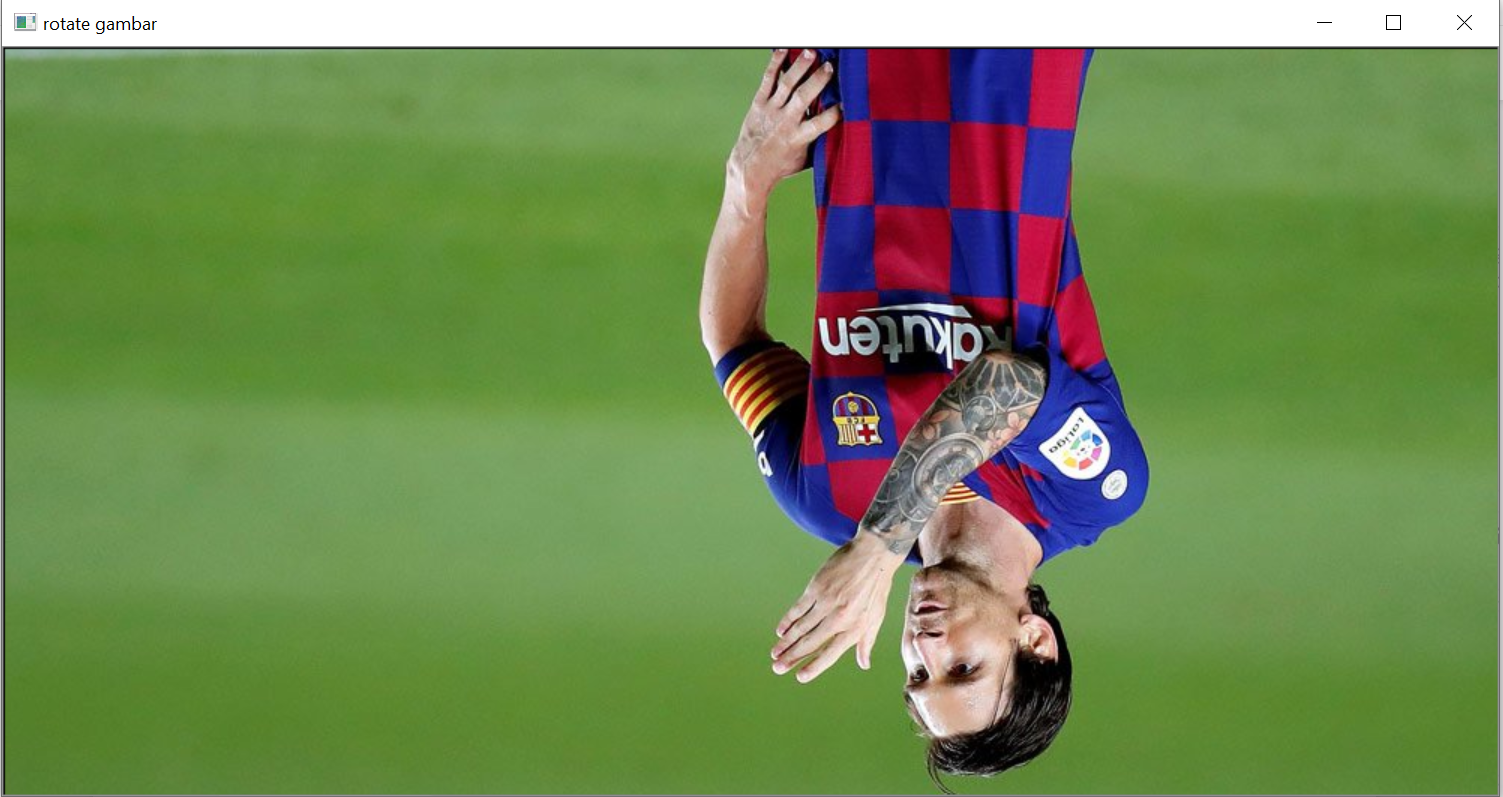

In [7]:
M = cv2.getRotationMatrix2D(center, 180, 0.5)
rotated = cv2.warpAffine(img, M, (w, h))
cv2.imshow("rotate gambar", rotated)
cv2.waitKey(0)

48

Ini adalah output ketika kita menggunakan skala 0.5
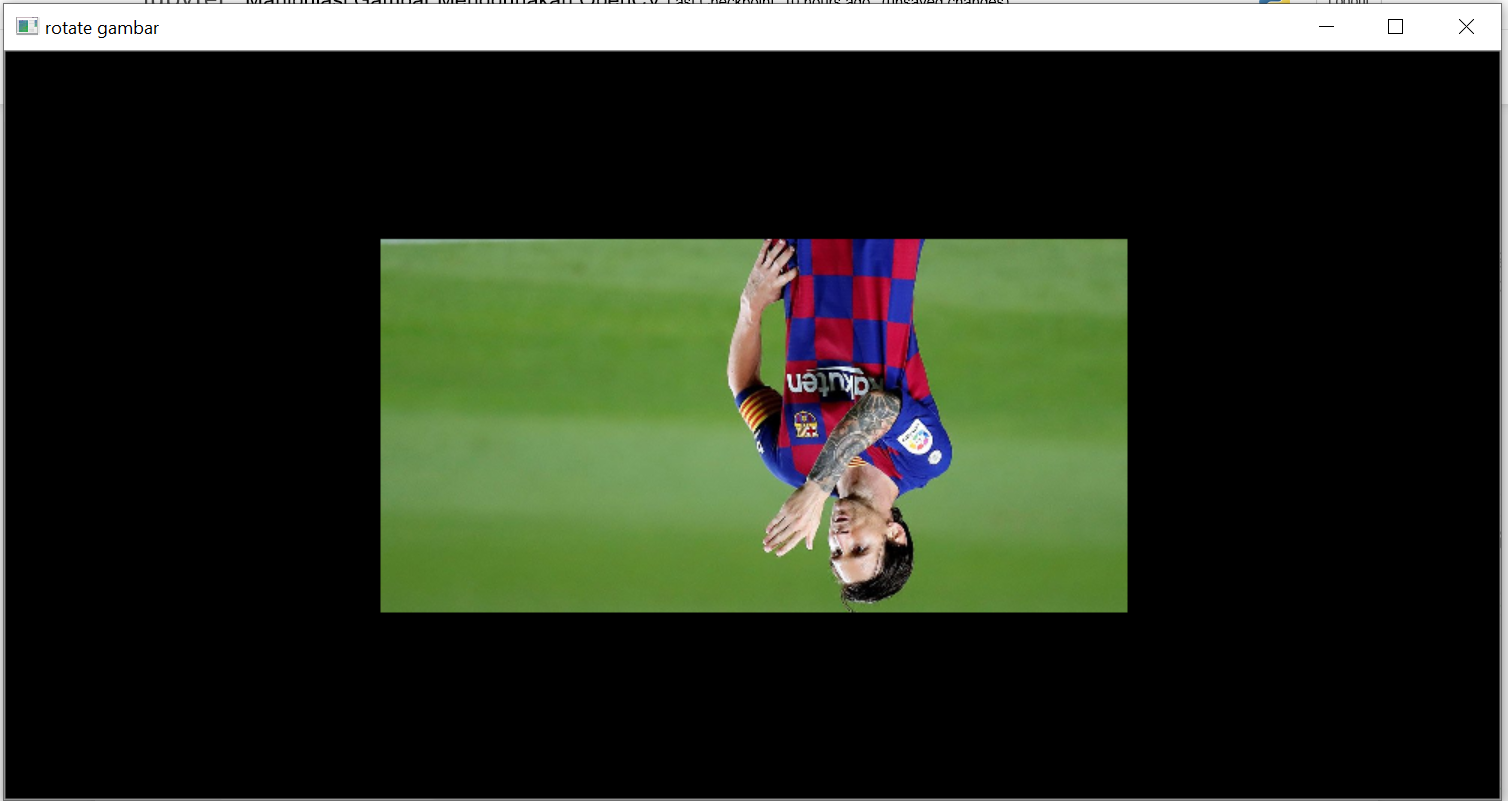

In [8]:
M = cv2.getRotationMatrix2D(center, 180, 2.0)
rotated = cv2.warpAffine(img, M, (w, h))
cv2.imshow("rotate gambar", rotated)
cv2.waitKey(0)

48

Dan ini ketika kita menggunakan skala 2.0
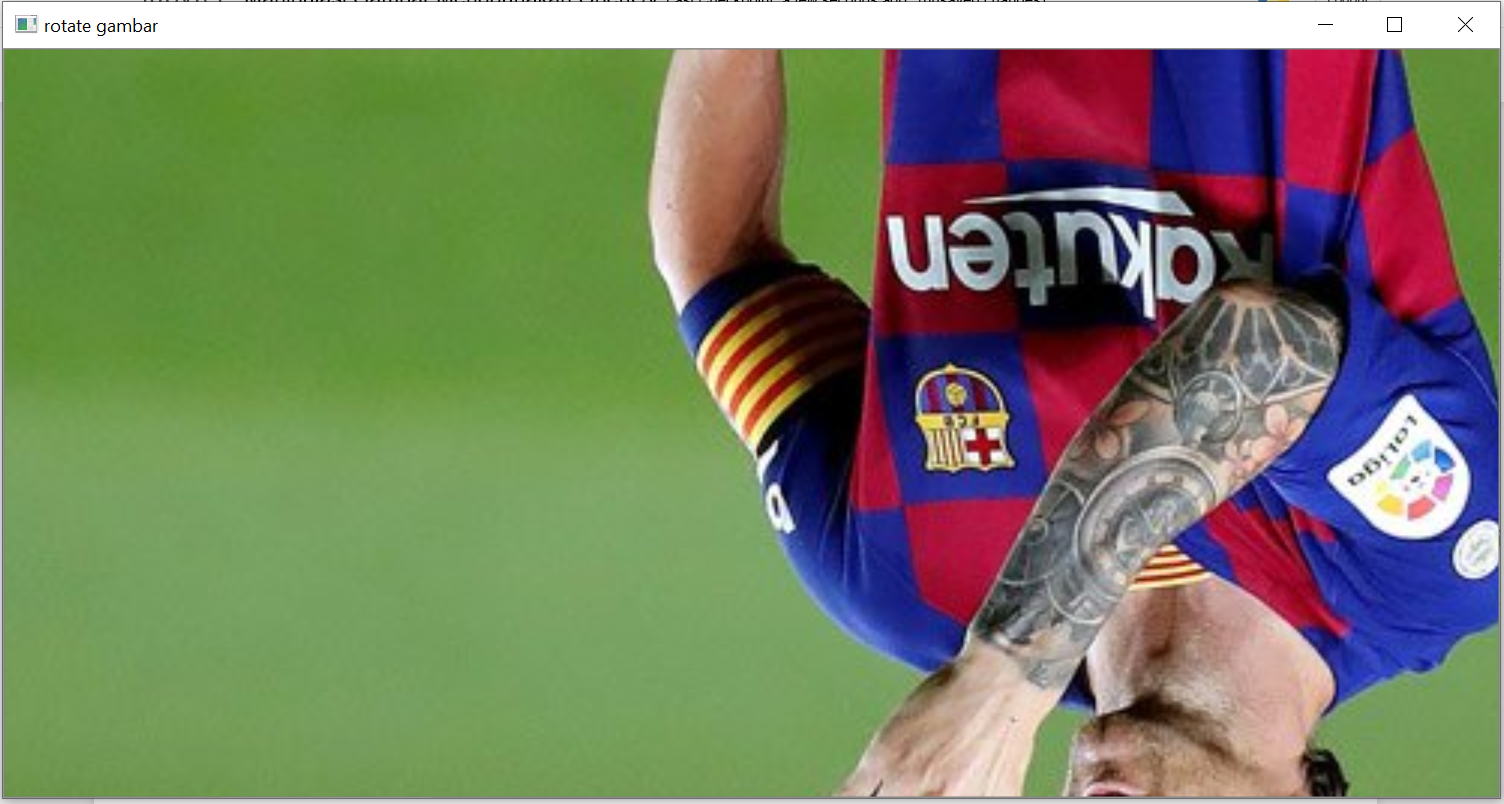

Jadi bisa terlihat ya perbedaannya jika menggunakan skala 1.0,0.5, dan 2.0

In [17]:
# crop the image using array slices -- it's a NumPy array
cropped = img[10:170, 280:400]
cv2.imshow("cropp gambar", cropped)
cv2.waitKey(0)

48

Selanjutnya kita akan coba crop foto ini dengan Python dan OpenCV. Yang kita lakukan hanyalah slicing arrays. slicing arrays dengan python berarti mengambil elemen dari satu indeks yang diberikan ke indeks yang lainnya.
Kita menyediakan koordinat startY dan endY, diikuti oleh koordinat startX dan endX. Hasilnya seperti dibawah ini
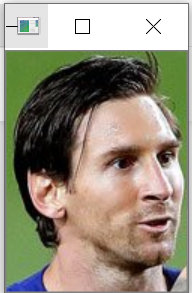

In [18]:
# write the cropped image to disk in PNG format
cv2.imwrite("hasil.png", cropped)

True

Selanjutnya kita akan simpan gambar pakai fungsi imwrite, argumen pertama ini adalah nama file dan argumen kedua adalah file yang sudah kita crop. Berikut hasilnya
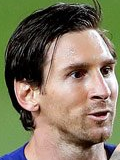

Mungkin seperti itu manipulasi gambar dasar dengan Python dan OpenCV. See you next post